In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Download daily stock prices for American Express (AXP) and S&P 500 index (ˆGSPC) for the last 5 years
axp_data = yf.download('AXP', start='2017-01-01', end='2022-01-01')
gspc_data = yf.download('^GSPC', start='2017-01-01', end='2022-01-01')
print(axp_data.head)
print(gspc_data.head)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

<bound method NDFrame.head of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-01-03   74.889999   75.750000   74.739998   75.349998   67.424644   
2017-01-04   75.260002   76.550003   75.059998   76.260002   68.529968   
2017-01-05   76.000000   76.180000   74.820000   75.320000   67.685242   
2017-01-06   75.400002   75.919998   75.059998   75.470001   67.820038   
2017-01-09   76.139999   76.500000   75.529999   75.860001   68.170502   
...                ...         ...         ...         ...         ...   
2021-12-27  165.000000  165.000000  162.529999  164.389999  158.440689   
2021-12-28  163.600006  166.130005  163.600006  164.410004  158.459961   
2021-12-29  164.619995  164.929993  163.259995  163.830002  157.900955   
2021-12-30  164.619995  165.800003  164.000000  164.160004  158.218994   
2021-12-31  164.100006  165.169998  163.250000  163.600006  157.679291   

       

In [5]:
# Calculate daily returns
axp_returns = axp_data['Close'].pct_change()
gspc_returns = gspc_data['Close'].pct_change()
print(axp_returns.head)
print(gspc_returns.head)

<bound method NDFrame.head of Date
2017-01-03         NaN
2017-01-04    0.012077
2017-01-05   -0.012326
2017-01-06    0.001992
2017-01-09    0.005168
                ...   
2021-12-27    0.001218
2021-12-28    0.000122
2021-12-29   -0.003528
2021-12-30    0.002014
2021-12-31   -0.003411
Name: Close, Length: 1259, dtype: float64>
<bound method NDFrame.head of Date
2017-01-03         NaN
2017-01-04    0.005722
2017-01-05   -0.000771
2017-01-06    0.003517
2017-01-09   -0.003549
                ...   
2021-12-27    0.013839
2021-12-28   -0.001010
2021-12-29    0.001402
2021-12-30   -0.002990
2021-12-31   -0.002626
Name: Close, Length: 1259, dtype: float64>


Text(0, 0.5, 'Frequency')

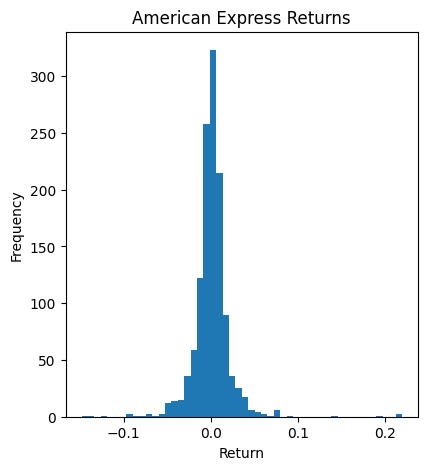

In [6]:
# Plot histogram of returns for both
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(axp_returns, bins=50)
plt.title('American Express Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')


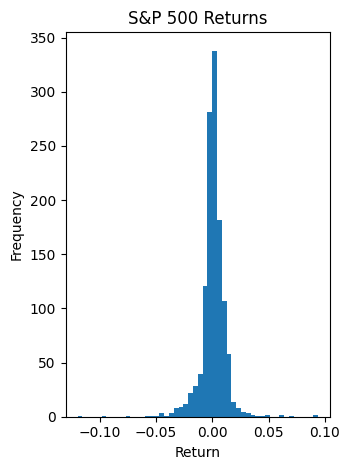

In [7]:
plt.subplot(1, 2, 2)
plt.hist(gspc_returns, bins=50)
plt.title('S&P 500 Returns')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [8]:
# Calculate % of times that the return of American Express was negative (< 0) conditional on the returns of the S&P 500 being positive
cond_returns = axp_returns[gspc_returns > 0]
neg_returns_pct = (cond_returns < 0).mean() * 100
print(f'Percentage of times American Express return was negative when S&P 500 return was positive: {neg_returns_pct:.2f}%')

Percentage of times American Express return was negative when S&P 500 return was positive: 27.11%
